<a href="https://colab.research.google.com/github/yossun/RitelOnline/blob/main/Homework_YosuaHinarno_Ritel_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
import pandas as pd
import numpy as np

df_dataset = pd.read_csv('/content/drive/MyDrive/DataAsset/Rakamin Trial Class - Data Science #17/Homework/ online_retail_II.csv')
df_dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### Create New Feature: Year

In [ ]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'])
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
df_dataset['Year'] = pd.DatetimeIndex(df_dataset['InvoiceDate']).year
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 73.3+ MB


### Filtering Data

In [ ]:
sales = df_dataset[ (df_dataset['Quantity'] >= 1) & (~df_dataset['Invoice'].str.contains('C'))]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [ ]:
sales['Revenue'] = sales['Quantity'] * sales['Price']
sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [ ]:
sales.groupby('Year')['Revenue'].mean()

Year
2009    18.713273
2010    19.908987
2011    20.058767
Name: Revenue, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

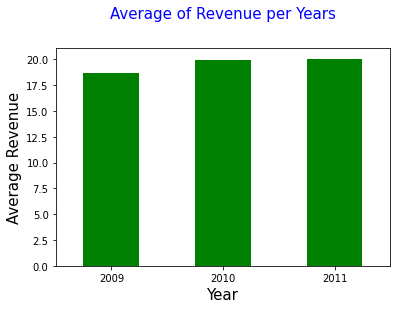

In [ ]:
plt.clf()
sales.groupby('Year')['Revenue'].mean().plot(kind='bar', color='green')
plt.title('Average of Revenue per Years',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Average Revenue',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

### Interpretation

Dari grafik rata-rata Revenue per tahun diatas dapat disimpulkan bahwa:

Rata-rata pendapatan tiap tahun selalu mengalami peningkatan memiliki rata-rata pendapatan tahunan, yaitu dari tahun 2009 hingga tahun 2011.
Rata-rata pendapatan tertinggi ada pada tahun 2011, yaitu sebesar 20.06
Rata-rata pendapatan terendah ada pada tahun 2009, yaitu sebesar 18.71
Kenaikan rata-rata tertinggi ada pada tahun 2009 ke tahun 2010, yaitu sebesar 1.2
Sedangkan rata-rata kenaikan pendapatan tahunan dari tahun 2009 hingga tahun 2011, yaitu sekitar 0.675

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = sales[sales['Customer ID'].notnull()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [ ]:
cancel = df_dataset[df_dataset['Invoice'].str.contains('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [ ]:
# Perhitungan transaksi dilakukan dengan menjumlahkan ID transaksi atau Invoice yang sama di tiap tahun
# Invoice yang sama = 1 transaksi

The_Year_2009 = finished[finished['Year'] == 2009].groupby('Invoice')['Description'].count()
The_Year_2010 = finished[finished['Year'] == 2010].groupby('Invoice')['Description'].count()
The_Year_2011 = finished[finished['Year'] == 2011].groupby('Invoice')['Description'].count()
Number_of_Finished = pd.DataFrame({'Year':[2009,2010,2011],'Transactions':[The_Year_2009.shape[0],The_Year_2010.shape[0],The_Year_2011.shape[0]]})
Number_of_Finished

,Year,Transactions
0,2009,1512
1,2010,18327
2,2011,17136


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

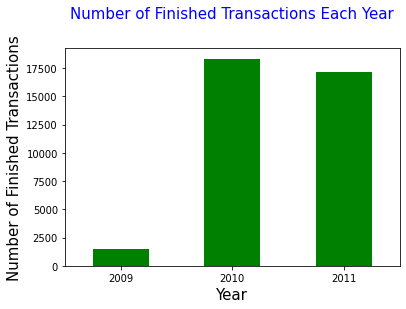

In [ ]:
plt.clf()
Number_of_Finished.groupby('Year')['Transactions'].sum().plot(kind='bar', color='green')
plt.title('Number of Finished Transactions Each Year',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Finished Transactions',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

In [ ]:
# Perhitungan transaksi dilakukan dengan menjumlahkan ID transaksi atau Invoice yang sama di tiap tahun
# Invoice yang sama = 1 transaksi

The_Year_2009 = cancel[cancel['Year'] == 2009].groupby('Invoice')['Description'].count()
The_Year_2010 = cancel[cancel['Year'] == 2010].groupby('Invoice')['Description'].count()
The_Year_2011 = cancel[cancel['Year'] == 2011].groupby('Invoice')['Description'].count()
Number_of_Canceled = pd.DataFrame({'Year':[2009,2010,2011],'Transactions':[The_Year_2009.shape[0],The_Year_2010.shape[0],The_Year_2011.shape[0]]})
Number_of_Canceled

,Year,Transactions
0,2009,401
1,2010,4381
2,2011,3510


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

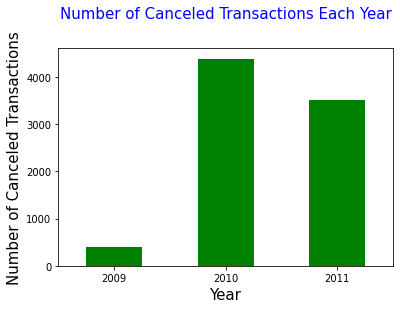

In [ ]:
plt.clf()
Number_of_Canceled.groupby('Year')['Transactions'].sum().plot(kind='bar', color='green')
plt.title('Number of Canceled Transactions Each Year',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Canceled Transactions',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

### Cancellation Rate

In [ ]:
# Perhitungan jumlah customer dilakukan dengan mendeteksi Customer ID sebagai identitas customer

The_Year_2009 = cancel[cancel['Year'] == 2009].groupby('Customer ID')['Invoice'].count()
The_Year_2010 = cancel[cancel['Year'] == 2010].groupby('Customer ID')['Invoice'].count()
The_Year_2011 = cancel[cancel['Year'] == 2011].groupby('Customer ID')['Invoice'].count()
Cancellation_Rate = pd.DataFrame({'Year':[2009,2010,2011],'Number of Customers who Cancel Order':[The_Year_2009.shape[0],The_Year_2010.shape[0],The_Year_2011.shape[0]]})

The_Year_2009 = finished[finished['Year'] == 2009].groupby('Customer ID')['Invoice'].count()
The_Year_2010 = finished[finished['Year'] == 2010].groupby('Customer ID')['Invoice'].count()
The_Year_2011 = finished[finished['Year'] == 2011].groupby('Customer ID')['Invoice'].count()
finished_order = pd.DataFrame({'Year':[2009,2010,2011],'Finish Order':[The_Year_2009.shape[0],The_Year_2010.shape[0],The_Year_2011.shape[0]]})

Cancellation_Rate['Total Customers'] = Cancellation_Rate['Number of Customers who Cancel Order'] + finished_order['Finish Order']
Cancellation_Rate['Cancellation Rate (%)'] = (Cancellation_Rate['Number of Customers who Cancel Order'] / Cancellation_Rate['Total Customers']) * 100
Cancellation_Rate

,Year,Number of Customers who Cancel Order,Total Customers,Cancellation Rate (%)
0,2009,309,1264,24.446203
1,2010,1730,5963,29.012242
2,2011,1494,5714,26.146307


### Interpretation

Beberapa hal yang disimpulkan dari output nomor 3 dan 4 adalah :
* Transaksi yang terselesaikan pada tahun 2009 adalah 1,512 (per Invoice / ID Transaksi), sedangkan transaksi yang dibatalkan pada tahun 2009 adalah 401 (per Invoice / ID Transaksi)
* Transaksi yang terselesaikan pada tahun 2010 adalah 18,327 (per Invoice / ID Transaksi), sedangkan transaksi yang dibatalkan pada tahun 2010 adalah 4,381 (per Invoice / ID Transaksi)
* Transaksi yang terselesaikan pada tahun 2011 adalah 17,136 (per Invoice / ID Transaksi), sedangkan transaksi yang dibatalkan pada tahun 2011 adalah 3,510 (per Invoice / ID Transaksi)
* Pada tahun 2009, persentasi transaksi yang dibatalkan adalah 20.97%, sedangkan Cancellation Rate / Persentase pelanggan yang melakukan pembatalan order di tahun 2009 sekitar 24.45%
* Pada tahun 2010, persentasi transaksi yang dibatalkan adalah 23.9%, sedangkan Cancellation Rate / Persentase pelanggan yang melakukan pembatalan order di tahun 2010 sekitar 29.01%
* Pada tahun 2011, persentasi transaksi yang dibatalkan adalah 20.48%, sedangkan Cancellation Rate / Persentase pelanggan yang melakukan pembatalan order di tahun 2011 sekitar 26.15%

* Pada tahun 2010, pembatalan transaksi dan pembatalan order yang dilakukan pelanggan pada persentasi paling tinggi dari tahun sebelum dan sesudahnya. Sedangkan pada tahun tersebut merupakan tahun dengan total transaksi dari tahun sebelum dan sesudahnya. Dapat disimpulkan adanya potensi penurunan transaksi pada tahun selanjutnya.